# Decision Trees

Classification model, potentially better than Logistic Regression

While simple, they quickly become complicated and are easily susceptible to overfitting. Also, by their nature, splits are always made at the current optimal outcome without considering the ultimate outcomes.

When working with the Titanic survival prediction data last time, we suggested a simple model that classifies all women as survivors and all men as non-survivors. This model is an example of a simple decision tree with only one branch or split.

Let's create the gender-based model on the Titanic training set using decision trees in Python. First we'll load some libraries and preprocess the Titanic data:

In [1]:
import numpy as np
import pandas as pd

In [3]:
# Load and prepare Titanic data
titanic_train = pd.read_csv("data/titanic/train.csv")    # Read the data

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [4]:
from sklearn import tree
from sklearn import preprocessing

In [5]:
label_encoder = preprocessing.LabelEncoder()

encoded_sex = label_encoder.fit_transform(titanic_train.Sex)

tree_model = tree.DecisionTreeClassifier()

tree_model.fit(X = pd.DataFrame(encoded_sex),
               y=titanic_train.Survived)

DecisionTreeClassifier()

In [7]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
import graphviz

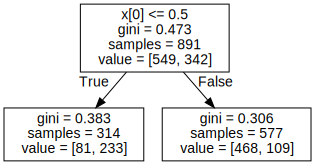

In [12]:
dot_data = tree.export_graphviz(tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [14]:
preds = tree_model.predict_proba(X=pd.DataFrame(encoded_sex))

female = preds[titanic_train.Sex == "female"][0][1]
male = preds[titanic_train.Sex == "male"][0][1]

print(f'Female suvival probability: {female}\nMale suvival probability: {male}')

Female suvival probability: 0.7420382165605095
Male suvival probability: 0.18890814558058924


In [16]:
predictors = pd.DataFrame([encoded_sex, titanic_train.Pclass]).T

tree_model.fit(X=predictors, y=titanic_train.Survived)
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

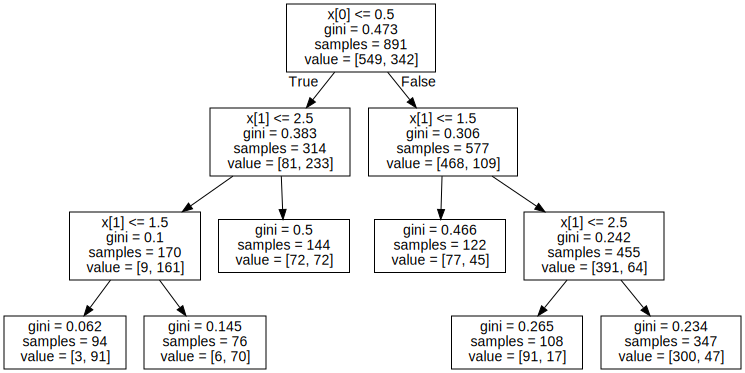

In [17]:
dot_data = tree.export_graphviz(tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph

Note that X[0] is the first variable, Sex, and X[1] is the second, Class

In [18]:
preds = tree_model.predict_proba(X=predictors)
pd.crosstab(preds[:,0], columns=[titanic_train.Pclass,titanic_train.Sex] )

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

The table shows, eg. 94 females in 1st Class with a death rate of 3%, 76 females in 2nd Class with an 8% death rate, etc.

In [19]:
predictors = pd.DataFrame([encoded_sex,
                           titanic_train["Pclass"],
                           titanic_train["Age"],
                           titanic_train["Fare"]]).T

# Initialize model with maximum tree depth set to 8
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

tree_model.fit(X = predictors, 
               y = titanic_train["Survived"])
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

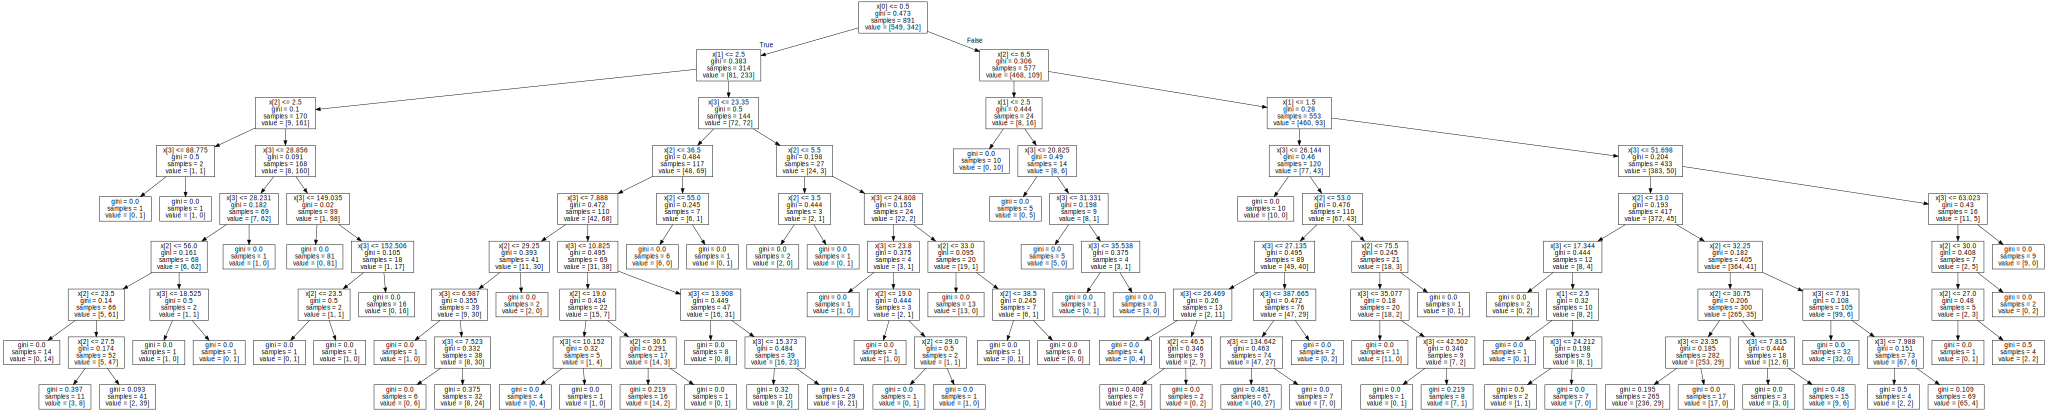

In [20]:
# Save tree as dot file
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [21]:
predictors = pd.DataFrame([encoded_sex,
                           titanic_train["Pclass"],
                           titanic_train["Age"],
                           titanic_train["Fare"]]).T

# Initialize model with maximum tree depth set to 4
tree_model = tree.DecisionTreeClassifier(max_depth = 4)

tree_model.fit(X = predictors, 
               y = titanic_train["Survived"])
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

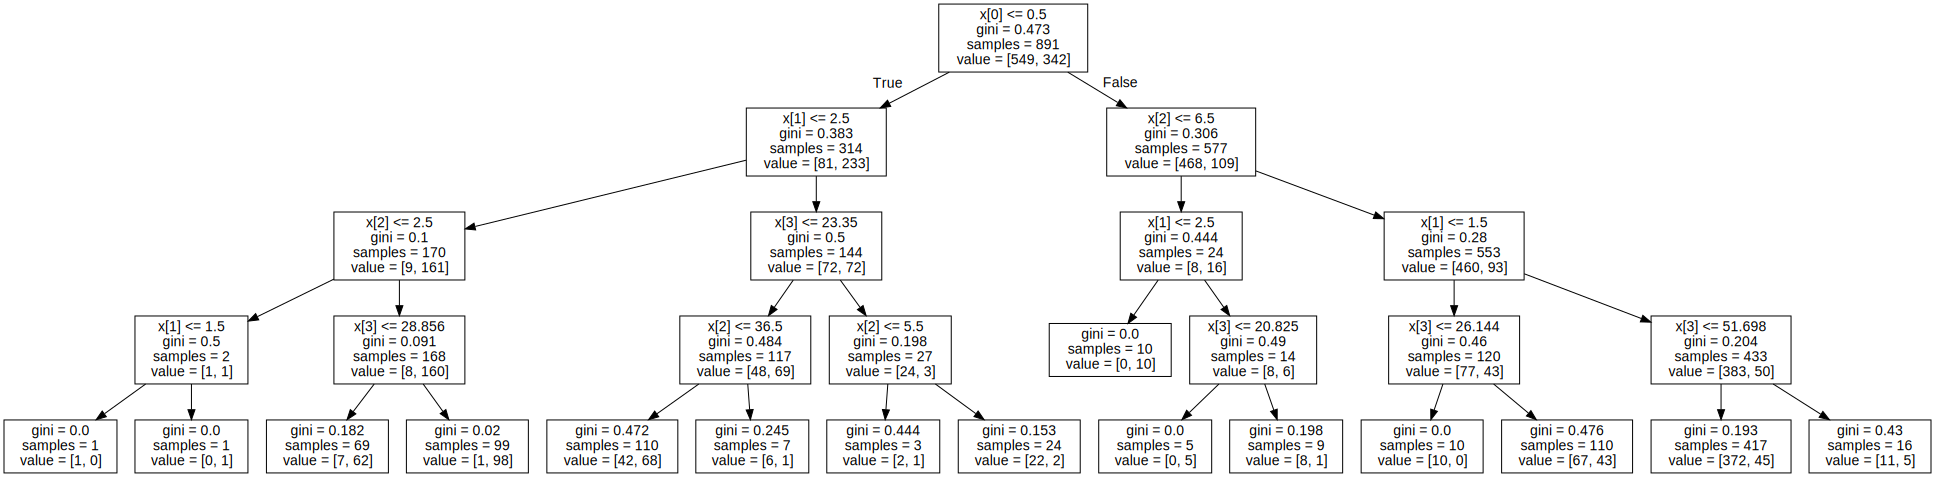

In [22]:
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 